In [1]:
#data loading
import pandas as pd
filename="/content/prostateSurvival.csv"
a=pd.read_csv(str(filename))

print(a)

       rownames grade stage ageGroup  survTime  status
0             1  mode   T1c      80+        18       0
1             2  mode  T1ab    75-79        23       0
2             3  poor   T1c    75-79        37       0
3             4  mode    T2    70-74        27       0
4             5  mode   T1c    70-74        42       0
...         ...   ...   ...      ...       ...     ...
14289     14290  mode    T2    75-79         4       0
14290     14291  mode   T1c    75-79        11       0
14291     14292  mode    T2    70-74         8       0
14292     14293  mode    T2    75-79         6       0
14293     14294  mode    T2    75-79        86       0

[14294 rows x 6 columns]


In [2]:
##Checking for null values
a.isna().sum()

,0
rownames,0
grade,0
stage,0
ageGroup,0
survTime,0
status,0


In [4]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
b=LabelEncoder()
target="status"

#transform string into int
transformColumns={1,2,3}
for x in transformColumns:
    a[a.columns[x]]=b.fit_transform(a[a.columns[x]])

print(a)

       rownames  grade  stage  ageGroup  survTime  status
0             1      0      1         3        18       0
1             2      0      0         2        23       0
2             3      1      1         2        37       0
3             4      0      2         1        27       0
4             5      0      1         1        42       0
...         ...    ...    ...       ...       ...     ...
14289     14290      0      2         2         4       0
14290     14291      0      1         2        11       0
14291     14292      0      2         1         8       0
14292     14293      0      2         2         6       0
14293     14294      0      2         2        86       0

[14294 rows x 6 columns]


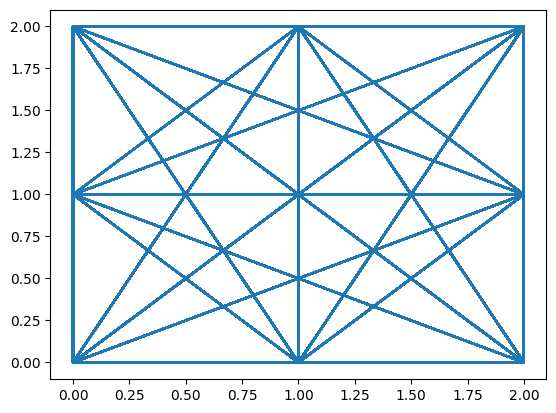

In [5]:
from matplotlib import pyplot as plt

index=2
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 14294 artists>

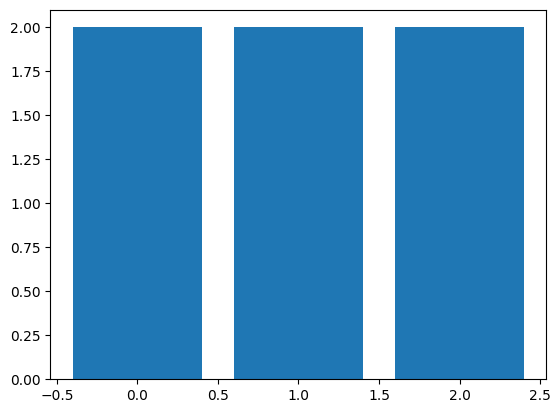

In [6]:
plt.bar(a[a.columns[2]],a[str(target)])

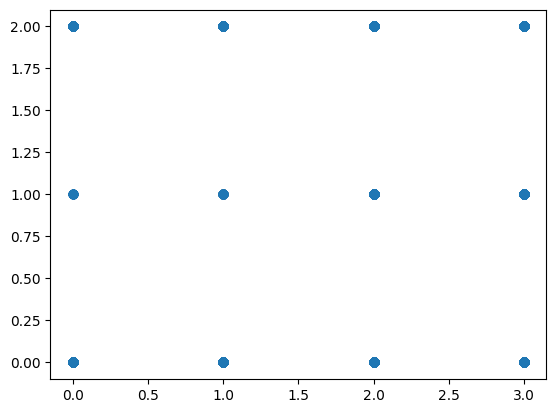

In [7]:
plt.scatter(a[a.columns[3]], a[str(target)])

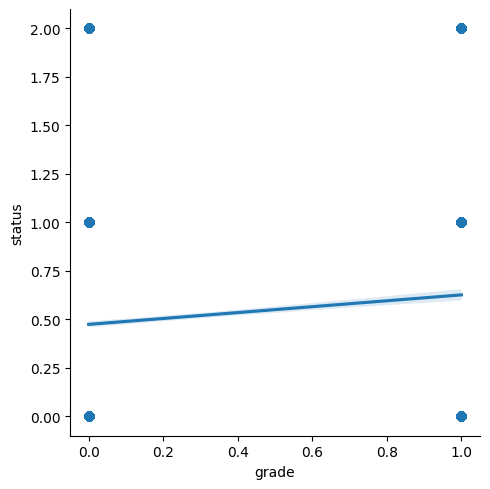

In [9]:
import seaborn as sns
#a["Purpose"] = pd.to_numeric(a["Purpose"])
#a["Count"] = pd.to_numeric(a["Count"])
sns.lmplot(x="grade",y=str(target),data=a)

<Axes: xlabel='survTime', ylabel='status'>

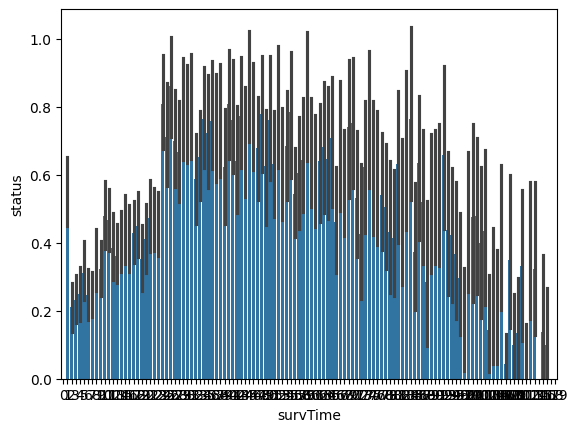

In [10]:
sns.barplot(x=a.columns[4],y=str(target),data=a)

<Axes: xlabel='stage', ylabel='status'>

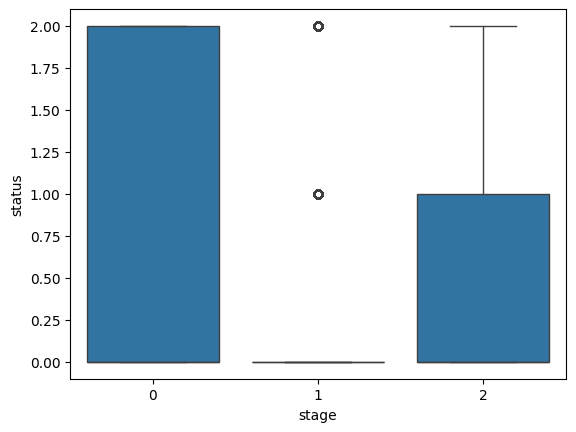

In [12]:
sns.boxplot(x=a.columns[2],y=str(target),data=a)

<ipython-input-13-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='status', ylabel='Density'>

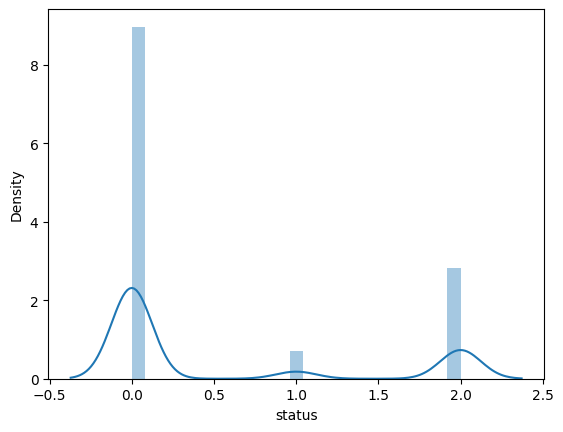

In [13]:
sns.distplot(a[str(target)])

<Axes: xlabel='ageGroup', ylabel='Density'>

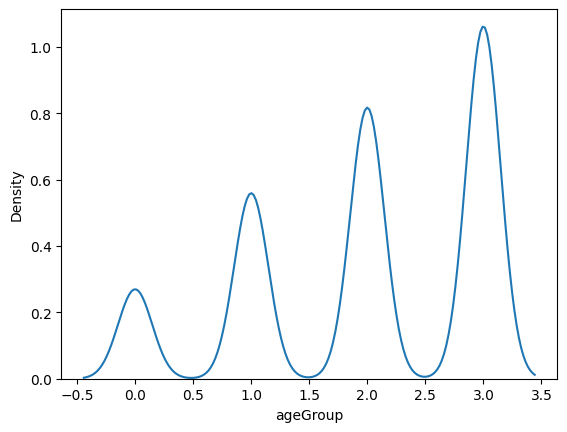

In [14]:
sns.kdeplot(a[a.columns[3]])

<Axes: xlabel='stage', ylabel='count'>

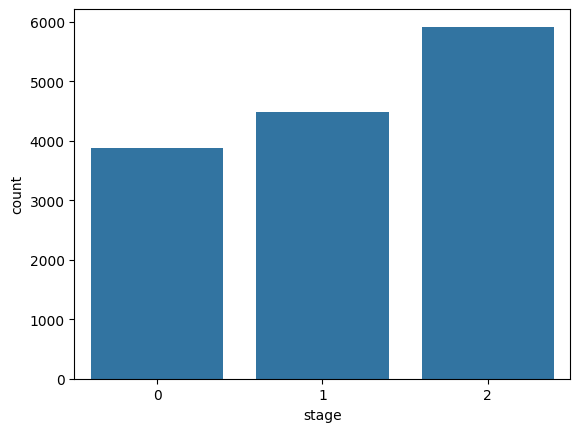

In [15]:
sns.countplot(x=a.columns[2],data=a)

<Axes: >

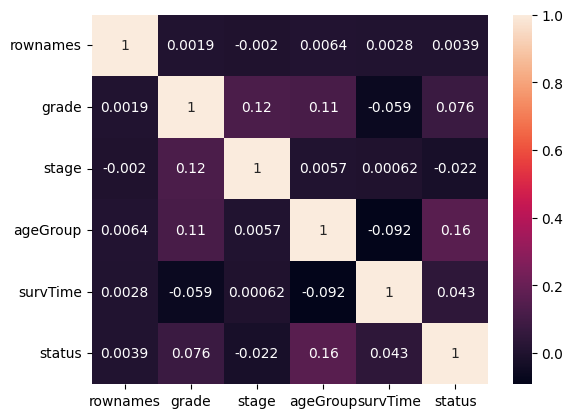

In [16]:
#data=a.select_dtypes(include=np.number).corr()
data=a.corr()

sns.heatmap(data, annot=True)

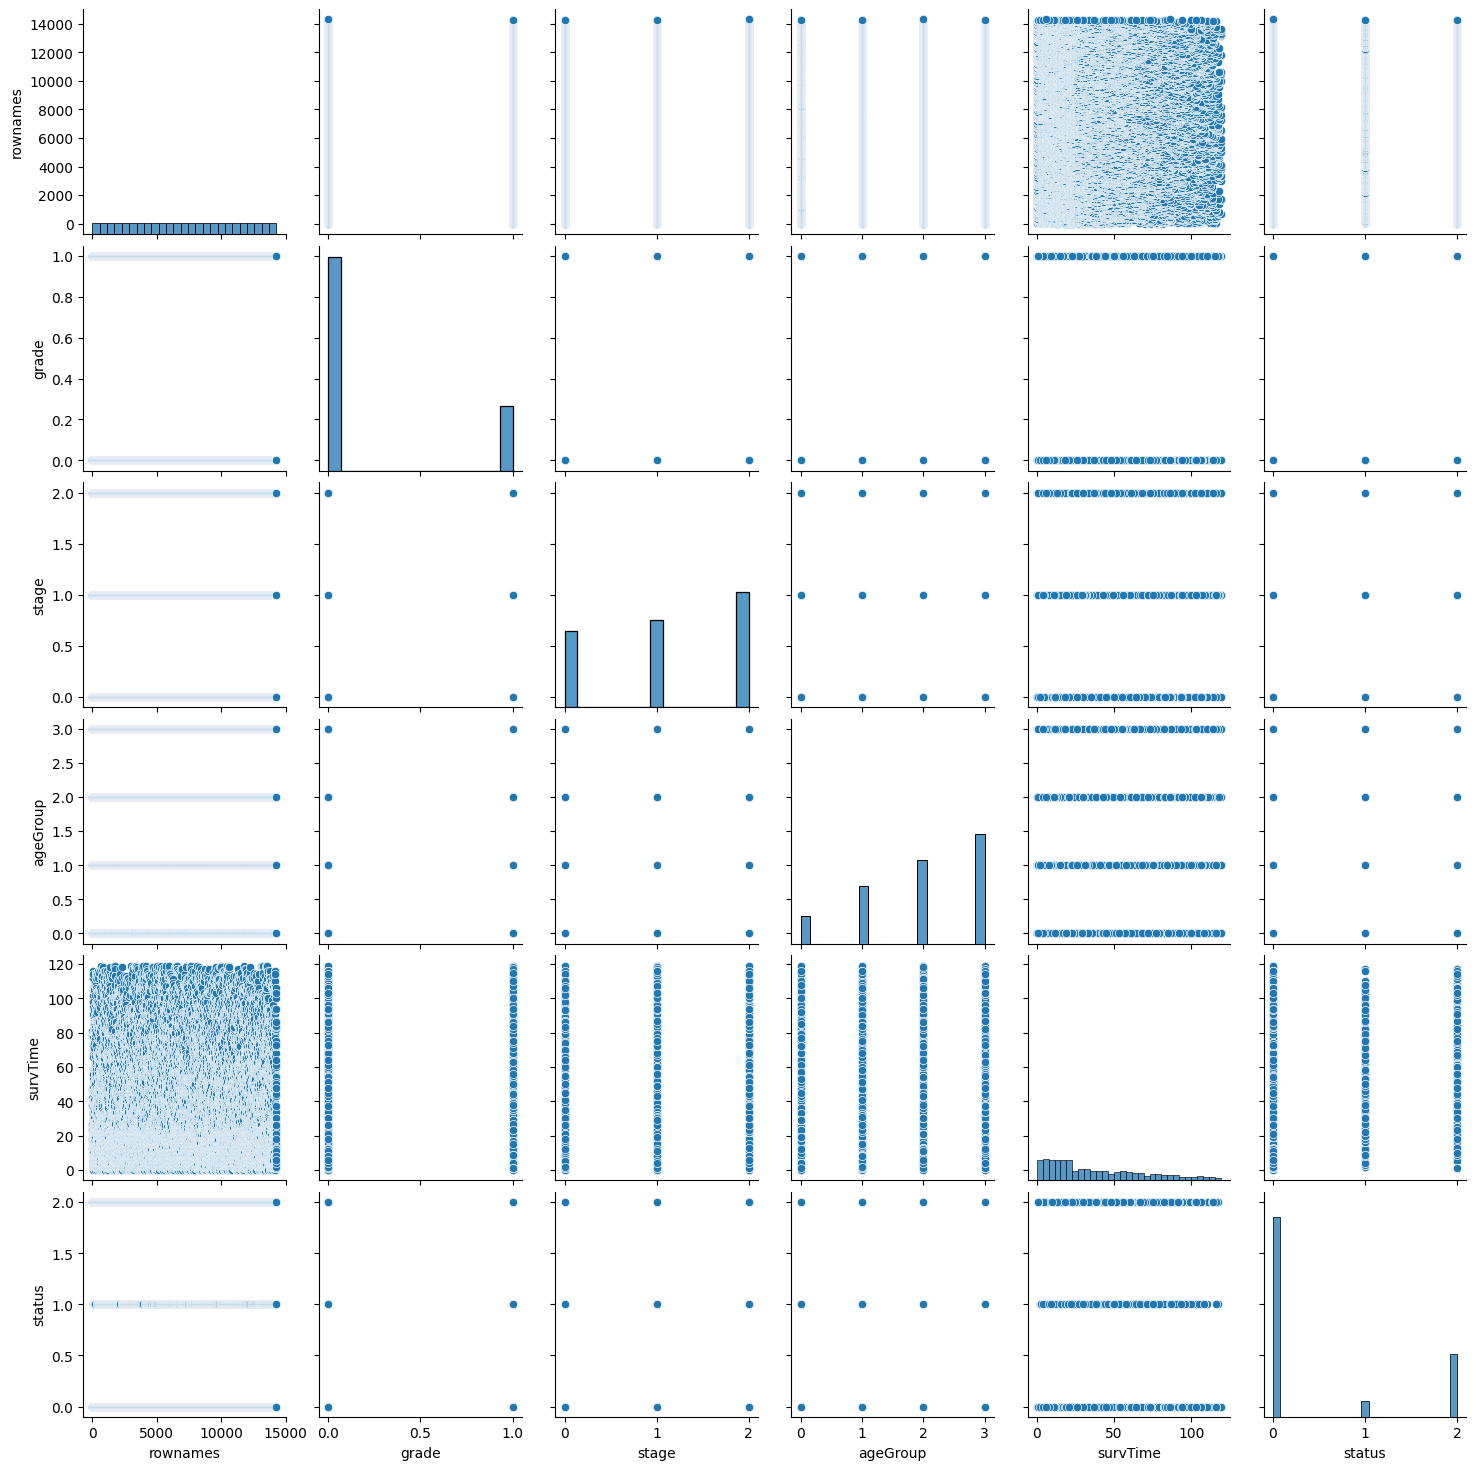

In [17]:
sns.pairplot(data=a)

In [18]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

       rownames  grade  stage  ageGroup  survTime
0             1      0      1         3        18
1             2      0      0         2        23
2             3      1      1         2        37
3             4      0      2         1        27
4             5      0      1         1        42
...         ...    ...    ...       ...       ...
14289     14290      0      2         2         4
14290     14291      0      1         2        11
14291     14292      0      2         1         8
14292     14293      0      2         2         6
14293     14294      0      2         2        86

[14294 rows x 5 columns]


In [19]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
14289    0
14290    0
14291    0
14292    0
14293    0
Name: status, Length: 14294, dtype: int64


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
print(x_train)

       rownames  gender  ethnicity  birth  readk  read1  read2  read3  mathk  \
10900    175562       1          4     15    0.0    0.0    0.0     28    0.0   
4697      76286       1          4     14    0.0    0.0    0.0      0    0.0   
8055     130025       1          1     15    0.0    0.0  582.0     77    0.0   
2673      43888       2          1      9    0.0    0.0  584.0     64    0.0   
8666     139801       2          0     15    0.0    0.0    0.0      0    0.0   
...         ...     ...        ...    ...    ...    ...    ...    ...    ...   
1792      29791       2          4     13  448.0    0.0    0.0      0  473.0   
2959      48457       2          4     15  470.0    0.0    0.0      0  473.0   
10155    163638       1          4     12  437.0  519.0    0.0      0  559.0   
3382      55232       1          4     13  413.0    0.0    0.0      0  459.0   
2458      40445       1          1     14  413.0  519.0  564.0     67  459.0   

       math1  math2  math3  schoolid1  

In [21]:
print(y_train)

11137    2
9768     0
10524    0
14000    0
2631     0
        ..
6387     0
9658     1
3001     0
7968     0
4133     0
Name: status, Length: 11435, dtype: int64


In [22]:
print(x_test)

       rownames  grade  stage  ageGroup  survTime
9573       9574      0      0         0        68
12386     12387      0      0         1        10
1500       1501      0      2         2        30
10629     10630      0      0         2         3
10803     10804      0      0         3        74
...         ...    ...    ...       ...       ...
6833       6834      0      0         1        37
10078     10079      0      1         3        46
10726     10727      0      0         1        53
998         999      0      2         3        14
1780       1781      0      0         3        19

[2859 rows x 5 columns]


In [23]:
print(y_test)

9573     0
12386    0
1500     2
10629    0
10803    0
        ..
6833     0
10078    0
10726    0
998      2
1780     0
Name: status, Length: 2859, dtype: int64


In [24]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [25]:
print(ypred)

[0.30788237 0.34140611 0.42755806 ... 0.41299925 0.52910189 0.60372224]


In [27]:
print(model.predict([[9574,0,0,0,68]]))

[0.30788237]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
from sklearn.tree import DecisionTreeRegressor
b=DecisionTreeRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [29]:
print(ypred)

[0. 0. 0. ... 0. 0. 0.]


In [30]:
print(model.predict([[9574,0,0,0,68]]))

[0.30788237]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [31]:
from sklearn.ensemble import RandomForestRegressor
b=RandomForestRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [32]:
print(ypred)

[0.54 0.02 0.52 ... 0.28 0.69 0.49]


In [34]:
print(model.predict([[9574,0,0,0,68]]))

[0.30788237]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
